In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [22]:
train = pd.read_csv("movies_train.csv")
test = pd.read_csv("movies_test.csv")
submission = pd.read_csv("submission.csv")

In [4]:
train.drop({'release_time','director'},axis=1,inplace=True)

In [27]:
train['dir_prev_bfnum'].mean()
test['dir_prev_bfnum'].mean()

891669.5160436138

In [28]:
train.fillna(1050442,inplace=True)
test.fillna(891669,inplace=True)

In [12]:
train.set_index('title',inplace=True)

In [18]:
train.drop({'screening_rat'},axis=1,inplace=True)

<AxesSubplot:>

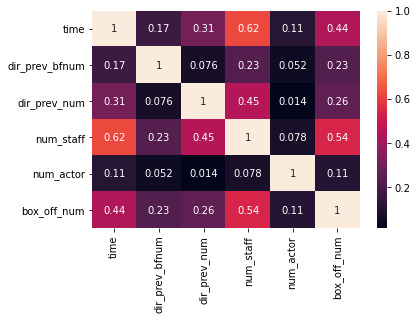

In [19]:
sns.heatmap(train.corr(),annot=True)

In [23]:
features=['time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor']
label=['box_off_num']

In [30]:
X_train=train[features]
X_test=test[features]
Y_train=train[label]
Y_test=submission[label]

In [51]:
LR=LinearRegression()
LR.fit(X_train,Y_train)
box_office=LR.predict(X_test)


In [55]:
submission['box_off_num']=box_office

In [56]:
submission

,title,box_off_num,box_office_num
0,용서는 없다,1.670730e+06,1.670730e+06
1,아빠가 여자를 좋아해,1.412505e+06,1.412505e+06
2,하모니,2.821661e+06,2.821661e+06
3,의형제,2.019305e+06,2.019305e+06
4,평행 이론,1.628432e+06,1.628432e+06
...,...,...,...
238,해에게서 소년에게,-4.623245e+05,-4.623245e+05
239,울보 권투부,-2.501914e+05,-2.501914e+05
240,어떤살인,1.099717e+06,1.099717e+06
241,말하지 못한 비밀,3.383380e+05,3.383380e+05
